In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


# Read a DEM file with RasterIO. 
The DEM is from CARTOSAT-1 (https://www.isro.gov.in/Spacecraft/cartosat-1)

In [4]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
dem = rio.open("/content/drive/MyDrive/extra_projects/all_dem/C1_DEM_16B_2005-2014_v3_R-1_72E19N_e43a/cdne43a_v3r1/cdne43a.tif")
dem_array = dem.read(1).astype('float64')


# Visualize the DEM.

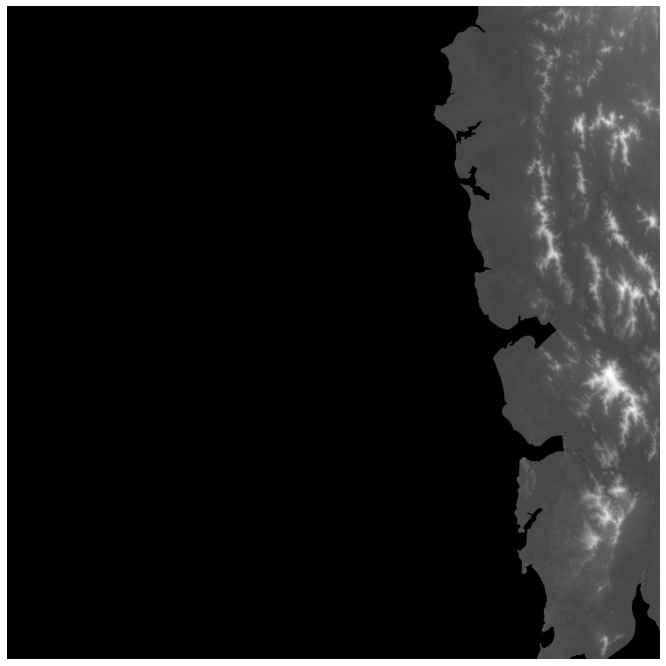

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
plt.axis('off')
plt.show()


In [7]:
!pip install richdem

     |████████████████████████████████| 4.5 MB 4.3 MB/s 


# Analyzing DEM with RichDEM
RichDEM is a set of digital elevation model (DEM) hydrologic analysis tools.

In [8]:
import richdem as rd
dem_richdem = rd.rdarray(dem_array, no_data=-9999)


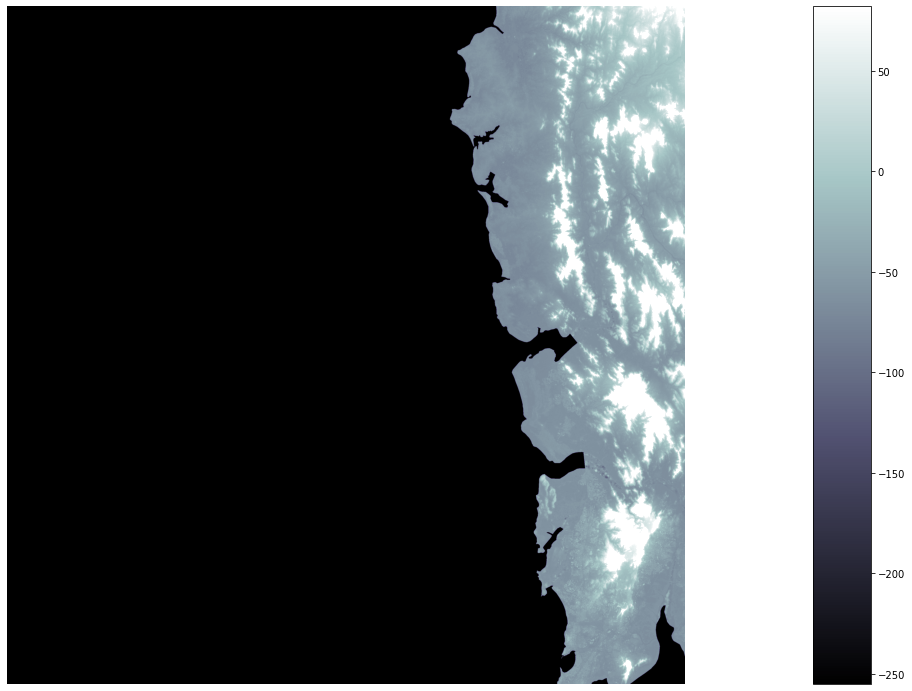

{'vmax': 82.0, 'vmin': -255.0}

In [10]:
fig = rd.rdShow(dem_richdem, axes=False, cmap='bone', figsize=(16, 10));
fig


# Terrain Attributes
RichDEM can calculate a number of terrain attributes. (https://richdem.readthedocs.io/en/latest/terrain_attributes.html)



#Slope

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


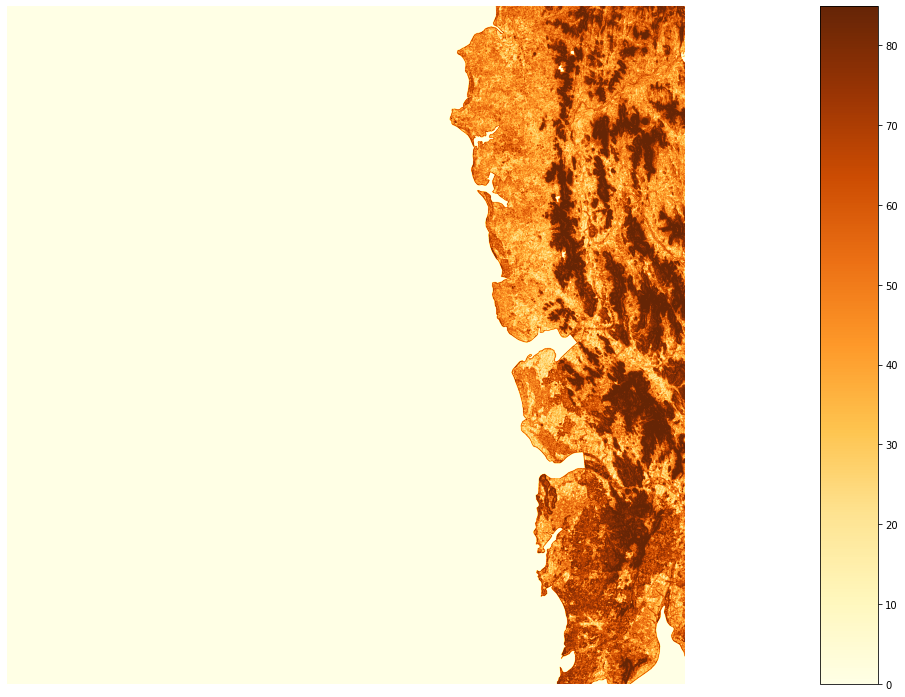

In [11]:
dem_slope = rd.TerrainAttribute(dem_richdem, attrib='slope_degrees')
rd.rdShow(dem_slope, axes=False, cmap='YlOrBr', figsize=(16, 10));


# Aspect

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


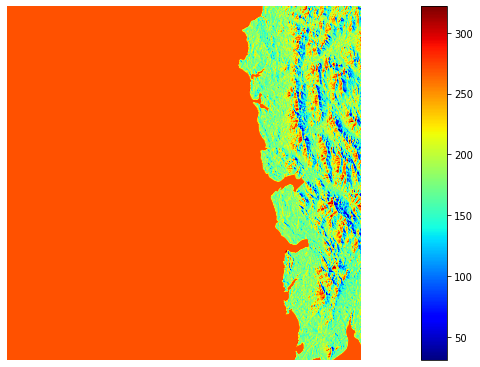

{'vmax': 321.7098388671875, 'vmin': 30.963756561279297}

In [12]:
aspect = rd.TerrainAttribute(dem_richdem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8,5.5))


# Read DEM with GDAL
We will use GDAL in order to open the file and read it in as a 2D array.

In [14]:
!pip install gdal

In [15]:
import gdal
filename = "/content/drive/MyDrive/extra_projects/all_dem/C1_DEM_16B_2005-2014_v3_R-1_72E19N_e43a/cdne43a_v3r1/cdne43a.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# Visualize Data with Matplotlib


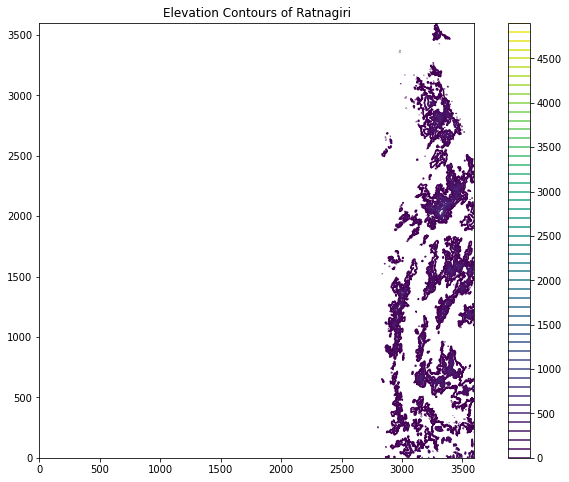

In [17]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Ratnagiri")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [18]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 3.7 MB/s 
     |████████████████████████████████| 16.7 MB 49.7 MB/s 
     |████████████████████████████████| 6.3 MB 33.3 MB/s 
